In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [74]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [75]:
df.shape

(200, 5)

In [76]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [77]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [78]:
v1=df['Gender'].value_counts()
v1

Gender
Female    112
Male       88
Name: count, dtype: int64

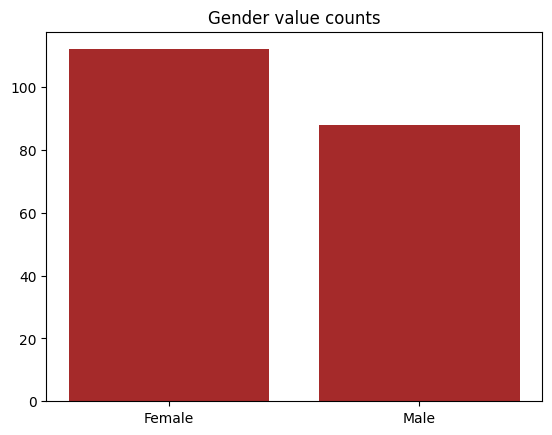

In [79]:
plt.bar(v1.index,v1.values,color='brown')
plt.title("Gender value counts")
plt.show()

In [80]:
x=df.iloc[:,[2,3,4]]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [81]:
#find no.of clusters

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42) #init - KMeans initialization
    data.fit(x)
    wcss.append(data.inertia_) #append variance to list
wcss

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51133.031385281385,
 44640.02804853041,
 40809.751227205954,
 37128.00867935386]

Text(0.5, 1.0, 'Elbow points')

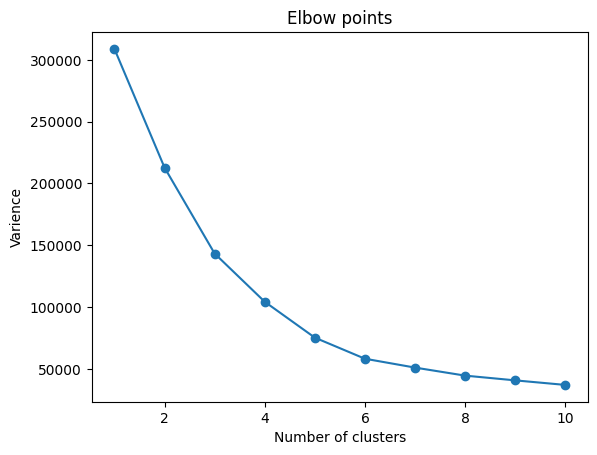

In [82]:

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Varience")
plt.title("Elbow points")

#elbow point - when the graph become const

In [83]:
#no.of clusters=7

data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
data1.fit(x)
y_pred=data1.predict(x)
y_pred

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 2,
       5, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6])

In [84]:
x['clusters']=y_pred
x

C:\Users\DELL\AppData\Local\Temp\ipykernel_11904\2744546302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters']=y_pred


,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5
...,...,...,...,...
195,35,120,79,6
196,45,126,28,4
197,32,126,74,6
198,32,137,18,4


In [85]:
#supervised ml

xx=x.iloc[:,:-1].values
xx

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [86]:
y=x.iloc[:,-1].values
y

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 2,
       5, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6])

In [87]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(xx,y,test_size=0.30,random_state=42)
x_train

array([[ 32,  87,  63],
       [ 27,  60,  50],
       [ 21,  30,  73],
       [ 58,  20,  15],
       [ 21,  33,  81],
       [ 50,  67,  57],
       [ 48,  39,  36],
       [ 36, 103,  85],
       [ 68,  59,  55],
       [ 44,  73,   7],
       [ 33,  42,  60],
       [ 40,  71,  95],
       [ 19,  81,   5],
       [ 24,  38,  92],
       [ 51,  67,  43],
       [ 19,  64,  46],
       [ 45,  28,  32],
       [ 35,  74,  72],
       [ 23,  62,  41],
       [ 19,  63,  54],
       [ 20,  16,   6],
       [ 40,  54,  48],
       [ 50,  40,  55],
       [ 28, 101,  68],
       [ 32, 103,  69],
       [ 48,  54,  46],
       [ 29,  79,  83],
       [ 42,  34,  17],
       [ 34, 103,  23],
       [ 19,  46,  55],
       [ 46,  25,   5],
       [ 32,  75,  93],
       [ 49,  62,  48],
       [ 18,  33,  92],
       [ 35,  19,  99],
       [ 47, 120,  16],
       [ 30,  78,  73],
       [ 35,  18,   6],
       [ 35,  28,  61],
       [ 27,  67,  56],
       [ 31,  17,  40],
       [ 53,  33

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

y_pred2=model.predict(x_test)
y_pred2

array([2, 0, 5, 4, 4, 2, 2, 4, 4, 0, 1, 4, 3, 2, 4, 3, 1, 4, 1, 2, 2, 5,
       4, 2, 2, 1, 2, 1, 3, 2, 0, 5, 1, 2, 4, 1, 3, 3, 4, 1, 1, 6, 5, 5,
       1, 6, 0, 0, 3, 1, 2, 3, 0, 2, 1, 1, 4, 1, 4, 1])

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred2)
cm

array([[ 6,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 0,  1, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [90]:
acc=accuracy_score(y_test,y_pred2)
acc

0.9833333333333333